<a href="https://colab.research.google.com/github/PaulToronto/Hands-on-Maching-Learning-Book/blob/main/3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

## `sklearn.datasets`

- Mostly 3 types of functions:
    1. `fetch_*`: such as `fetch_openml()` for real-life datasets
    2. `load_*`: to load small toy datasets
    3. `make_*`: to generate fake dataset
- Generated datasets are often returned as an `(X,y)` tuple of NumPy arrays
- Other datasets are returned as `sklearn.utils.Bunch` objects which are dictionaries which generally contain the following keys:
    - `"DESCR"`
    - `"data"`, the input data, usually a Numpy Array
    - `"target"`
- `fetch_openml()` returns the inputs as a Pandas DataFrame and the labels as a Pandas Series
    - but the MNIST dataset contains images, so it is best to set `as_frame=False` to get the data as Numpy arrays instead

## MNIST

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
X, y = mnist.data, mnist.target
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y.head()

,class
0,5
1,0
2,4
3,1
4,9


In [6]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [7]:
type(mnist)

sklearn.utils._bunch.Bunch

In [8]:
X, y = mnist.data, mnist.target
X.shape, y.shape

((70000, 784), (70000,))

In [9]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [11]:
print(mnist.feature_names[:6], '\n\n', mnist.target_names)

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6'] 

 ['class']


In [12]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [13]:
print(X[0].reshape(28, 28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

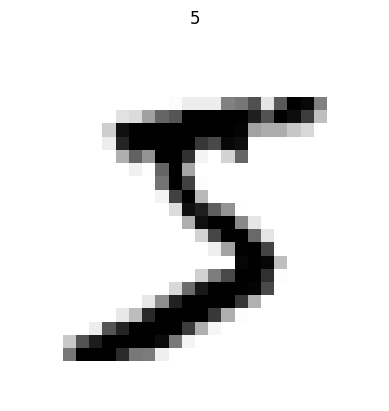

In [14]:
def plot_digit(image_data, label_data=None):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    if label_data:
        plt.title(label_data)

plot_digit(X[0], y[0])

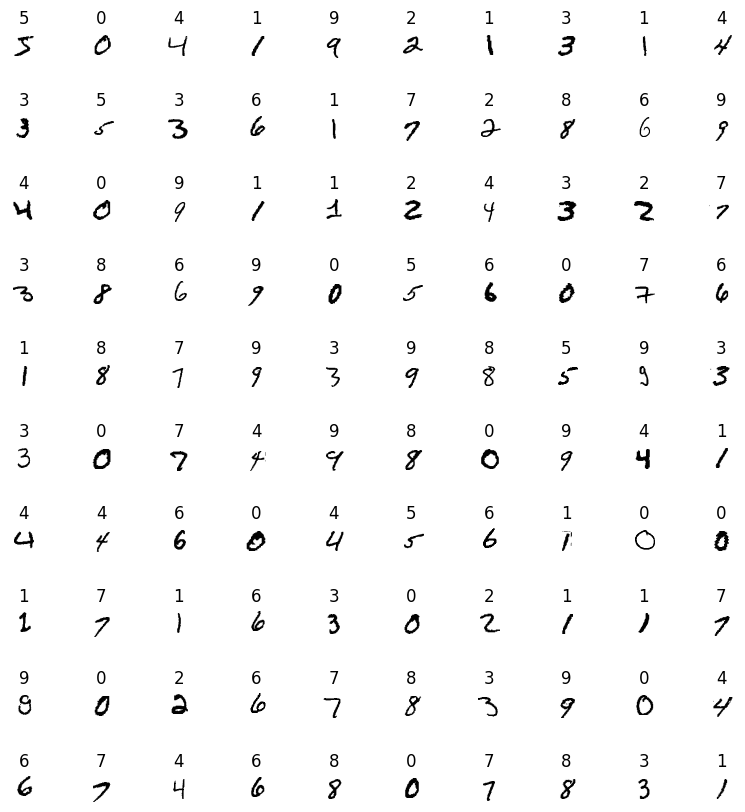

In [15]:
plt.figure(figsize=(10, 10))
for i, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, i + 1)
    plot_digit(image_data, y[i])
plt.subplots_adjust(wspace=0, hspace=2)

## Train/Test Split

- the MNIST data returned by `fetch_openml()` is already split for us
    - the first 60000 rows are the train set
    - the last 10000 rows are the test set
    - some learning algorithms are sensitive to the order of the training instances
        - the training set is already split and shuffled for us (not always the case for datasets returned by `fetch_openml()`)
        - shuffling is not always a good idea (example: time series data)

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

## Training a Binary Classifier

- We simplify the problem by turning it into a "5" detector, which is a binary classification problem